In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

licencias = pd.read_csv(r"C:\Users\vazro\Desktop\FADD\Especialització\10_ SPRINT 10 - PROYECTO FINAL\Registre_de_llic_ncies_comercials_20240806.csv")

# Vamos a ver los primeros registros del dataset licencias.

licencias.head()

,Sol·licitant,Codi municipi,Municipi,Codi comarca,Comarca,Format de l'establiment,Sector d'activitat,Sup Venda (m2),Data Entrada DGC,Data Resolució (Ferma),Sentit Resolució (Ferma),UTM X,UTM Y,NIF Sol·licitant,Georeferència
0,"RAPEJUN, SL",431482.0,Tarragona,36.0,Tarragonès,Establiment Cial. Col·lectiu,Diversos,11556.9,28/10/2015,09/03/2016,Favorable,349019.0,4553055.0,B08604886,POINT (1.254358212 41.117434237)
1,"DECATHLON ESPAÑA, SA",81249.0,Mollet del Vallès,41.0,Vallès Oriental,Sup. Especialitzada,Esports,3163.0,07/12/2009,06/04/2010,Favorable,435279.0,4599476.0,A79935607,POINT (2.210310853 41.535411838)
2,"INVEST LA JONQUERA, SL",170865.0,"Jonquera, la",2.0,Alt Empordà,Recinte Comercial,Diversos,13238.0,03/04/2017,16/10/2017,Favorable,490228.0,4694461.0,B55052559,POINT (2.87315709 42.416903579)
3,"FORUM SPORT, SA",80734.0,Cornellà de Llobregat,11.0,Baix Llobregat,Sup. Especialitzada,Esports,1759.0,29/06/2006,10/09/2007,Favorable,422949.0,4577930.0,A48450456,POINT (2.070159567 41.355171447)
4,"WORTEN ESPAÑA DISTRIBUCIÓN, SL",82009.0,Sant Boi de Llobregat,11.0,Baix Llobregat,Sup. Especialitzada,Electrodomèstics,1995.0,07/01/2010,28/06/2010,Favorable,420365.0,4575800.0,B82140633,POINT (2.042704219 41.347524275)


In [2]:
# Vemos cuantas filas y columnas tiene el dataset:

licencias.shape

#Tiene 250 resgistros y 15 columnas.

(250, 15)

In [3]:
# Revisamos la base de datos para ver lo que hay que limpiar.

licencias.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 250 entries, 0 to 249
Data columns (total 15 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Sol·licitant              250 non-null    object 
 1   Codi municipi             249 non-null    float64
 2   Municipi                  250 non-null    object 
 3   Codi comarca              249 non-null    float64
 4   Comarca                   249 non-null    object 
 5   Format de l'establiment   250 non-null    object 
 6   Sector d'activitat        250 non-null    object 
 7   Sup Venda (m2)            250 non-null    float64
 8   Data Entrada DGC          250 non-null    object 
 9   Data Resolució (Ferma)    250 non-null    object 
 10  Sentit Resolució (Ferma)  250 non-null    object 
 11  UTM X                     249 non-null    float64
 12  UTM Y                     249 non-null    float64
 13  NIF Sol·licitant          250 non-null    object 
 14  Georeferèn

In [4]:
# Cambiamos el campo Data entrada y data resolució a formato fecha

licencias["Data Entrada DGC"] = pd.to_datetime(licencias["Data Entrada DGC"],format='%d/%m/%Y')
licencias["Data Resolució (Ferma)"] = pd.to_datetime(licencias["Data Resolució (Ferma)"], format='%d/%m/%Y')

licencias.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 250 entries, 0 to 249
Data columns (total 15 columns):
 #   Column                    Non-Null Count  Dtype         
---  ------                    --------------  -----         
 0   Sol·licitant              250 non-null    object        
 1   Codi municipi             249 non-null    float64       
 2   Municipi                  250 non-null    object        
 3   Codi comarca              249 non-null    float64       
 4   Comarca                   249 non-null    object        
 5   Format de l'establiment   250 non-null    object        
 6   Sector d'activitat        250 non-null    object        
 7   Sup Venda (m2)            250 non-null    float64       
 8   Data Entrada DGC          250 non-null    datetime64[ns]
 9   Data Resolució (Ferma)    250 non-null    datetime64[ns]
 10  Sentit Resolució (Ferma)  250 non-null    object        
 11  UTM X                     249 non-null    float64       
 12  UTM Y                 

In [5]:
# Añadimos una columna para calcular  el tiempo que tardan en conceder cada licencia. Lo dividimos entre 30 para obtener el resultado en meses.

licencias["meses"] = ((licencias["Data Resolució (Ferma)"] - licencias["Data Entrada DGC"]).dt.days)/30

# Vamos a ver como han quedado las fechas  y la nueva columna calculada a la que hemos llamado meses.

licencias[["meses","Data Resolució (Ferma)","Data Entrada DGC"]]
 




,meses,Data Resolució (Ferma),Data Entrada DGC
0,4.433333,2016-03-09,2015-10-28
1,4.000000,2010-04-06,2009-12-07
2,6.533333,2017-10-16,2017-04-03
3,14.600000,2007-09-10,2006-06-29
4,5.733333,2010-06-28,2010-01-07
...,...,...,...
245,6.266667,2008-04-30,2007-10-25
246,4.366667,2017-03-06,2016-10-26
247,10.000000,2009-09-03,2008-11-07
248,3.333333,2016-05-04,2016-01-25


Ahora vamos a limpiar el campo de solicitantes. Nos encontramos que la misma empresa tiene el nombre escrito de diferentes formas.
Vamos a unificar  los nombres.

In [6]:

#Cambiamos el nombre del corte inglés para unificarlo.

x = licencias["Sol·licitant"].str.contains("CORTE")

licencias[x]

# Creamos un dicccionario, con el valor erróneo y el valor correcto.
name_mapping = {
    "EL CORTE INGLÉS, SA": "EL CORTE INGLÉS, SA",
    "HIPERCOR, SA - EL CORTE INGLÉS, SA": "EL CORTE INGLÉS, SA"}
 
licencias["Sol·licitant"] = licencias["Sol·licitant"].replace(name_mapping, regex=True)




In [7]:
#Cambiamos Aldi

a = licencias["Sol·licitant"].str.contains("ALDI")

licencias[a]

# Creamos un dicccionario, con el valor erróneo y el valor correcto.
name_mapping = {
    "ALDI MASQUEFA SUPERMERCADOS, SL": "ALDI SUPERMERCADOS, SL",
    "ALDI REAL ESTATE, SLU":   "ALDI SUPERMERCADOS, SL",
    "ALDI SUPERMERCADOS, SL":  "ALDI SUPERMERCADOS, SL",
    "ALDI SUPERMERCADOS, SLU": "ALDI SUPERMERCADOS, SL",
    "ALDI SUPERMERCADOS, SLU": "ALDI SUPERMERCADOS, SL",
    "ALDI SUPERMERCADOS, SLU": "ALDI SUPERMERCADOS, SL"}


 
licencias["Sol·licitant"] = licencias["Sol·licitant"].replace(name_mapping, regex=True)

a = licencias["Sol·licitant"].str.contains("ALDI ")

licencias[a]


,Sol·licitant,Codi municipi,Municipi,Codi comarca,Comarca,Format de l'establiment,Sector d'activitat,Sup Venda (m2),Data Entrada DGC,Data Resolució (Ferma),Sentit Resolució (Ferma),UTM X,UTM Y,NIF Sol·licitant,Georeferència,meses
15,"ALDI SUPERMERCADOS, SL",171175.0,Palafrugell,10.0,Baix Empordà,Supermercat,Quotidià,175.51,2015-12-10,2016-04-01,Favorable,512725.0,4640080.0,B63667109,POINT (3.164065976 41.914954578),3.766667
85,"ALDI SUPERMERCADOS, SL",80961.0,Granollers,41.0,Vallès Oriental,Sup. Especialitzada,Eq. Llar,1099.52,2017-03-28,2018-04-09,Favorable,440265.0,4605265.0,B63667109,POINT (2.286822072 41.60808662),12.566667
98,"ALDI SUPERMERCADOS, SL",170669.0,Figueres,2.0,Alt Empordà,Supermercat,Quotidià,1120.46,2014-01-31,2014-07-03,Favorable,498680.0,4679348.0,B62409065,POINT (2.960886614 42.267209601),5.100000
128,"ALDI SUPERMERCADOS, SL",252038.0,"Seu d'Urgell, la",4.0,Alt Urgell,Supermercat,Quotidià,1125.00,2022-12-28,2023-05-09,Favorable,373144.0,4691142.0,B02883791,POINT (1.462430747 42.358097618),4.400000
143,"ALDI SUPERMERCADOS, SL",82055.0,Sant Cugat del Vallès,40.0,Vallès Occidental,Supermercat,Quotidià,1035.18,2015-01-02,2015-05-05,Favorable,422096.0,4593314.0,B63667109,POINT (2.082391608 41.469853438),4.100000
187,"ALDI SUPERMERCADOS, SLU",81477.0,Olesa de Montserrat,11.0,Baix Llobregat,Supermercat,Quotidià,1095.00,2021-11-03,2022-03-23,Favorable,408281.0,4599377.0,B63667109,POINT (1.893900541 41.543505944),4.666667
207,"ALDI SUPERMERCADOS, SL",80961.0,Granollers,41.0,Vallès Oriental,Supermercat,Quotidià,1216.42,2017-03-24,2017-08-01,Favorable,440310.0,4605250.0,B63667109,POINT (2.286822072 41.60808662),4.333333


In [8]:
# Cambiamos IKEA

b= licencias["Sol·licitant"].str.contains("IKEA")

licencias[b]

name_mapping = {
    "IKEA IBERICA, SA": "IKEA IBERICA, SA",
    "IKEA IBÉRICA, SA": "IKEA IBERICA, SA",
    "IKEA IBERICA, SAU": "IKEA IBERICA, SA"}
 
licencias["Sol·licitant"] = licencias["Sol·licitant"].replace(name_mapping, regex=True)

b= licencias["Sol·licitant"].str.contains("IKEA")

licencias[b]

,Sol·licitant,Codi municipi,Municipi,Codi comarca,Comarca,Format de l'establiment,Sector d'activitat,Sup Venda (m2),Data Entrada DGC,Data Resolució (Ferma),Sentit Resolució (Ferma),UTM X,UTM Y,NIF Sol·licitant,Georeferència,meses
52,"IKEA IBERICA, SA",80155.0,Badalona,13.0,Barcelonès,Sup. Especialitzada,Mobles,2785.00,2009-03-13,2010-01-21,Favorable,435365.0,4590179.0,A28812618,POINT (2.247791638 41.450026028),10.466667
54,"IKEA IBERICA, SA",81017.0,"Hospitalet de Llobregat, l'",13.0,Barcelonès,Sup. Especialitzada,Mobles,2822.39,2010-03-29,2010-10-15,Favorable,426700.0,4578665.0,A28812618,POINT (2.099712098 41.359459666),6.666667
101,"IKEA IBERICA, SA",81878.0,Sabadell,40.0,Vallès Occidental,Sup. Especialitzada,Mobles,23657.00,2009-12-16,2010-07-22,Favorable,425545.0,4595984.0,A28812618,POINT (2.108551925 41.546378033),7.266667
159,"IKEA IBERICA, SAU",431482.0,Tarragona,36.0,Tarragonès,Sup. Especialitzada,Mobles,19001.60,2016-04-12,2016-09-14,Favorable,349101.0,4554416.0,A28812618,POINT (1.254358212 41.117434237),5.166667
233,"IKEA IBERICA, SA",81017.0,"Hospitalet de Llobregat, l'",13.0,Barcelonès,Sup. Especialitzada,Mobles,4646.11,2013-07-04,2013-12-24,Favorable,426700.0,4578665.0,A28812618,POINT (2.099712098 41.359459666),5.766667


In [9]:
# Cambiamos Decathlon

c= licencias["Sol·licitant"].str.contains("DECAT")

licencias[c]

# CReamos un dicccionario, con el valor erróneo y el valor correcto.
name_mapping = {
    "DECATHLON ESPAÑA, SAU": "DECATHLON ESPAÑA, SA",
    "DECATHLON ESPAÑA SAU": "DECATHLON ESPAÑA, SA"}
 
 
licencias["Sol·licitant"] = licencias["Sol·licitant"].replace(name_mapping, regex=True)

In [10]:
# Cambiamos Metrovacesa

d= licencias["Sol·licitant"].str.contains("METROVA")

licencias[d]

name_mapping = {
    "METROVACESA, SA": "METROVACESA, SA",
    "METROVACESA, SA (ARA RODAMCO)": "METROVACESA, SA",
    

    }

 
licencias["Sol·licitant"] = licencias["Sol·licitant"].replace(name_mapping, regex=True)


In [11]:
d= licencias["Sol·licitant"].str.contains("METROVA")

licencias[d]




,Sol·licitant,Codi municipi,Municipi,Codi comarca,Comarca,Format de l'establiment,Sector d'activitat,Sup Venda (m2),Data Entrada DGC,Data Resolució (Ferma),Sentit Resolució (Ferma),UTM X,UTM Y,NIF Sol·licitant,Georeferència,meses
20,"METROVACESA, SA",431233.0,Reus,8.0,Baix Camp,Centre Comercial,Diversos,20500.0,2007-11-06,2008-04-30,Favorable,341595.0,4558710.0,A28017804,POINT (1.108491969 41.155016386),5.866667
86,"METROVACESA, SA (ARA RODAMCO)",80193.0,Barcelona,13.0,Barcelonès,Centre Comercial,Diversos,12247.0,2008-06-17,2009-01-15,Favorable,433150.0,4588230.0,A28017804,POINT (2.177241106 41.382405393),7.066667
136,"METROVACESA, SA",83015.0,Viladecans,11.0,Baix Llobregat,Centre Comercial,Diversos,4092.0,2009-02-03,2009-11-17,Favorable,418545.0,4573961.0,A28017804,POINT (2.019652409 41.315896769),9.566667
201,"METROVACESA, SA",251207.0,Lleida,33.0,Segrià,Centre Comercial,Diversos,28498.0,2007-11-06,2008-02-04,Desfavorable,302620.0,4610964.0,A28017804,POINT (0.626842574 41.614730589),3.000000


In [12]:
name_mapping = {
    "METROVACESA, SA": "METROVACESA, SA",
    "METROVACESA, SA (ARA RODAMCO) ": "METROVACESA, SA",

    }
 
 
licencias["Sol·licitant"] = licencias["Sol·licitant"].replace(name_mapping, regex=True)

In [13]:
# Cambiamos AKI bricolaje.


e= licencias["Sol·licitant"].str.contains("AKI")

licencias[e]

name_mapping = {
    "AKI BRICOLAJE ESPAÑA, SLU": "AKI BRICOLAJE ESPAÑA, SL"}
 
 
licencias["Sol·licitant"] = licencias["Sol·licitant"].replace(name_mapping, regex=True)


In [14]:
# Cambiamos Leroy Merlin

f= licencias["Sol·licitant"].str.contains("LEROY")

licencias[f]

name_mapping = {
    "LEROY MERLIN S.A": "LEROY MERLIN S.A",
    "LEROY MERLIN ESPAÑA, SLU": "LEROY MERLIN S.A",
    "LEROY MERLIN ESPAÑA, SL": "LEROY MERLIN S.A",
    "LEROY MERLIN S.A.": "LEROY MERLIN S.A",
    }
 
licencias["Sol·licitant"] = licencias["Sol·licitant"].replace(name_mapping, regex=True)

f= licencias["Sol·licitant"].str.contains("LEROY")

licencias[f]






,Sol·licitant,Codi municipi,Municipi,Codi comarca,Comarca,Format de l'establiment,Sector d'activitat,Sup Venda (m2),Data Entrada DGC,Data Resolució (Ferma),Sentit Resolució (Ferma),UTM X,UTM Y,NIF Sol·licitant,Georeferència,meses
18,LEROY MERLIN S.A,80155.0,Badalona,13.0,Barcelonès,Sup. Especialitzada,Bricolatge,2700.00,2005-01-13,2006-11-06,Favorable,435615.0,4590223.0,A31687650,POINT (2.247791638 41.450026028),22.066667
36,LEROY MERLIN S.A,80193.0,Barcelona,13.0,Barcelonès,Sup. Especialitzada,Bricolatge,6502.00,2008-07-25,2009-01-19,Favorable,433150.0,4588230.0,B84818442,POINT (2.177241106 41.382405393),5.933333
49,LEROY MERLIN S.A,81878.0,Sabadell,40.0,Vallès Occidental,Sup. Especialitzada,Bricolatge,9000.00,2009-12-22,2010-09-22,Favorable,425435.0,4596225.0,B84818442,POINT (2.108551925 41.546378033),9.133333
112,LEROY MERLIN S.A,82009.0,Sant Boi de Llobregat,11.0,Baix Llobregat,Sup. Especialitzada,Bricolatge,3065.00,2009-12-14,2010-07-21,Favorable,420474.0,4575992.0,B84818442,POINT (2.042704219 41.347524275),7.300000
118,LEROY MERLIN S.A,81075.0,Lliçà d'Amunt,41.0,Vallès Oriental,Recinte Comercial,Diversos,10000.00,2016-06-06,2016-10-03,Favorable,438281.0,4605998.0,B84818442,POINT (2.239433257 41.608466785),3.966667
130,LEROY MERLIN S.A,81136.0,Manresa,7.0,Bages,Sup. Especialitzada,Bricolatge,1255.00,2023-12-20,2024-04-29,Favorable,404291.0,4619897.0,B84818442,POINT (1.826928753 41.723055286),4.366667
171,LEROY MERLIN S.A,431482.0,Tarragona,36.0,Tarragonès,Sup. Especialitzada,Bricolatge,2643.00,2016-02-16,2016-07-04,Favorable,349193.0,4554893.0,B84818442,POINT (1.254358212 41.117434237),4.633333
176,LEROY MERLIN S.A,82055.0,Sant Cugat del Vallès,40.0,Vallès Occidental,Sup. Especialitzada,Bricolatge,8550.00,2014-06-30,2014-11-10,Favorable,420458.0,4593037.0,B84818442,POINT (2.082391608 41.469853438),4.433333
214,LEROY MERLIN S.A,251207.0,Lleida,33.0,Segrià,Sup. Especialitzada,Bricolatge,8365.33,2016-02-16,2016-11-21,Favorable,302865.0,4608820.0,B84818442,POINT (0.626842574 41.614730589),9.300000
217,LEROY MERLIN S.A,170792.0,Girona,20.0,Gironès,Sup. Especialitzada,Bricolatge,7633.77,2016-02-16,2020-12-23,Favorable,484212.0,4644742.0,B84818442,POINT (2.824865628 41.983155443),59.066667


In [15]:

# Cambiamos LIDL.

g= licencias["Sol·licitant"].str.contains("LIDL")

licencias[g]

name_mapping = {
    "LIDL SUPERMERCADOS, SAU": "LIDL SUPERMERCADOS, SA",
    
    
    }
 
licencias["Sol·licitant"] = licencias["Sol·licitant"].replace(name_mapping, regex=True)

g= licencias["Sol·licitant"].str.contains("LIDL")

licencias[g]

,Sol·licitant,Codi municipi,Municipi,Codi comarca,Comarca,Format de l'establiment,Sector d'activitat,Sup Venda (m2),Data Entrada DGC,Data Resolució (Ferma),Sentit Resolució (Ferma),UTM X,UTM Y,NIF Sol·licitant,Georeferència,meses
31,"LIDL SUPERMERCADOS, SA",81846.0,Rubí,40.0,Vallès Occidental,Supermercat,Quotidià,166.96,2011-07-22,2012-01-12,Favorable,419948.0,4593018.0,A60195278,POINT (2.031335058 41.493484672),5.800000
42,"LIDL SUPERMERCADOS, SA",82021.0,Sant Celoni,41.0,Vallès Oriental,Supermercat,Quotidià,426.00,2015-11-25,2016-04-07,Desfavorable,458867.0,4616138.0,A60195278,POINT (2.49251912 41.689962987),4.466667
71,"LIDL SUPERMERCADOS, SA",170622.0,"Escala, l'",2.0,Alt Empordà,Supermercat,Quotidià,492.00,2015-01-12,2015-12-01,Desfavorable,510168.0,4663742.0,A60195278,POINT (3.133767625 42.125058782),10.766667
84,"LIDL SUPERMERCADOS, SA",431482.0,Tarragona,36.0,Tarragonès,Supermercat,Quotidià,332.59,2011-08-17,2012-03-05,Favorable,350507.0,4553039.0,A60195278,POINT (1.254358212 41.117434237),6.700000
114,"LIDL SUPERMERCADOS, SA",170669.0,Figueres,2.0,Alt Empordà,Supermercat,Quotidià,289.35,2010-11-18,2011-06-17,Favorable,497921.0,4679540.0,A60195278,POINT (2.960886614 42.267209601),7.033333
135,"LIDL SUPERMERCADOS, SA",82093.0,Sant Fost de Campsentelles,41.0,Vallès Oriental,Supermercat,Quotidià,108.63,2011-12-15,2012-09-03,Favorable,435095.0,4597894.0,A60195278,POINT (2.232936617 41.518757192),8.766667
154,"LIDL SUPERMERCADOS, SA",431634.0,"Vendrell, el",12.0,Baix Penedès,Supermercat,Quotidià,1278.94,2017-06-02,2018-10-11,Favorable,377800.0,4565650.0,A60195278,POINT (1.53509551 41.220122319),16.533333
166,"LIDL SUPERMERCADOS, SA",82055.0,Sant Cugat del Vallès,40.0,Vallès Occidental,Supermercat,Quotidià,299.48,2015-01-12,2015-05-28,Favorable,422144.0,4593297.0,A60195278,POINT (2.082391608 41.469853438),4.533333
186,"LIDL SUPERMERCADOS, SA",170622.0,"Escala, l'",2.0,Alt Empordà,Supermercat,Quotidià,546.87,2019-12-09,2021-03-22,Favorable,510280.0,4663946.0,A60195278,POINT (3.133767625 42.125058782),15.633333
200,"LIDL SUPERMERCADOS, SA",171143.0,Olot,19.0,Garrotxa,Supermercat,Quotidià,1261.22,2021-07-05,2021-11-02,Favorable,456374.0,4670973.0,A60195278,POINT (2.484354623 42.183182657),4.000000


In [16]:
# Extraemos los datos de Geolocalización en dos campos que en el dataset original están en un mismo campo.

# Separamos en dos grupos uno será la longitud y otra la latitud , con la estructura '(x y)'
licencias[["longitud", "latitud"]] = licencias["Georeferència"].str.extract(r'POINT \(([^ ]+) ([^ ]+)\)')

# Convertimos las  columnas longitud y latitud tipo float 
licencias["longitud"] = licencias["longitud"].astype(float)
licencias["latitud"] = licencias["latitud"].astype(float)
licencias


,Sol·licitant,Codi municipi,Municipi,Codi comarca,Comarca,Format de l'establiment,Sector d'activitat,Sup Venda (m2),Data Entrada DGC,Data Resolució (Ferma),Sentit Resolució (Ferma),UTM X,UTM Y,NIF Sol·licitant,Georeferència,meses,longitud,latitud
0,"RAPEJUN, SL",431482.0,Tarragona,36.0,Tarragonès,Establiment Cial. Col·lectiu,Diversos,11556.90,2015-10-28,2016-03-09,Favorable,349019.0,4553055.0,B08604886,POINT (1.254358212 41.117434237),4.433333,1.254358,41.117434
1,"DECATHLON ESPAÑA, SA",81249.0,Mollet del Vallès,41.0,Vallès Oriental,Sup. Especialitzada,Esports,3163.00,2009-12-07,2010-04-06,Favorable,435279.0,4599476.0,A79935607,POINT (2.210310853 41.535411838),4.000000,2.210311,41.535412
2,"INVEST LA JONQUERA, SL",170865.0,"Jonquera, la",2.0,Alt Empordà,Recinte Comercial,Diversos,13238.00,2017-04-03,2017-10-16,Favorable,490228.0,4694461.0,B55052559,POINT (2.87315709 42.416903579),6.533333,2.873157,42.416904
3,"FORUM SPORT, SA",80734.0,Cornellà de Llobregat,11.0,Baix Llobregat,Sup. Especialitzada,Esports,1759.00,2006-06-29,2007-09-10,Favorable,422949.0,4577930.0,A48450456,POINT (2.070159567 41.355171447),14.600000,2.070160,41.355171
4,"WORTEN ESPAÑA DISTRIBUCIÓN, SL",82009.0,Sant Boi de Llobregat,11.0,Baix Llobregat,Sup. Especialitzada,Electrodomèstics,1995.00,2010-01-07,2010-06-28,Favorable,420365.0,4575800.0,B82140633,POINT (2.042704219 41.347524275),5.733333,2.042704,41.347524
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
245,"EL CORTE INGLÉS, SA",431482.0,Tarragona,36.0,Tarragonès,Gran Magatzem,Diversos,24200.00,2007-10-25,2008-04-30,Favorable,352525.0,4553921.0,A28017895,POINT (1.254358212 41.117434237),6.266667,1.254358,41.117434
246,"PROMYSA RENT, SA",431482.0,Tarragona,36.0,Tarragonès,Recinte Comercial,Diversos,800.75,2016-10-26,2017-03-06,Favorable,349245.0,4554635.0,A43055938,POINT (1.254358212 41.117434237),4.366667,1.254358,41.117434
247,"SOFAGER, SL",170669.0,Figueres,2.0,Alt Empordà,Sup. Especialitzada,Mobles,1108.00,2008-11-07,2009-09-03,Favorable,499923.0,4679612.0,B63321269,POINT (2.960886614 42.267209601),10.000000,2.960887,42.267210
248,"UNIBAIL-RODAMCO RETAIL SPAIN, SLU",NaN,Cornellà de Llobregat / El Prat de Llobregat,NaN,NaN,Centre Comercial,Diversos,4387.00,2016-01-25,2016-05-04,Favorable,422850.0,4577736.0,B86369915,NaN,3.333333,NaN,NaN


In [17]:
licencias.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 250 entries, 0 to 249
Data columns (total 18 columns):
 #   Column                    Non-Null Count  Dtype         
---  ------                    --------------  -----         
 0   Sol·licitant              250 non-null    object        
 1   Codi municipi             249 non-null    float64       
 2   Municipi                  250 non-null    object        
 3   Codi comarca              249 non-null    float64       
 4   Comarca                   249 non-null    object        
 5   Format de l'establiment   250 non-null    object        
 6   Sector d'activitat        250 non-null    object        
 7   Sup Venda (m2)            250 non-null    float64       
 8   Data Entrada DGC          250 non-null    datetime64[ns]
 9   Data Resolució (Ferma)    250 non-null    datetime64[ns]
 10  Sentit Resolució (Ferma)  250 non-null    object        
 11  UTM X                     249 non-null    float64       
 12  UTM Y                 

Vemos que hay un municipio que está vacío. Esto es El centro comercial Splau  el cual está localizado entre Cornellá y El prat.
Para simplificarlo he asignado todo este registro a Cornella ya que se la entrada del centro comercial está físicamente en Cornellá.

In [18]:
licencias.loc[248, 'Municipi'] = "Cornellà de Llobregat"
licencias.loc[248, 'Codi municipi'] = 80734.0
licencias.loc[248, 'Comarca'] = "Baix Llobregat"
licencias.loc[248, 'longitud'] = 2.070160
licencias.loc[248, 'latitud'] = 41.355171
licencias.loc[248, 'Georeferència'] = "POINT (2.070159567 41.355171447)"
licencias.loc[248, 'Codi comarca'] = 11.0
licencias.loc[248, 'UTM X'] = 422949.0
licencias.loc[248, 'UTM Y'] = 4577930.0
licencias.loc[248]

Sol·licitant                UNIBAIL-RODAMCO RETAIL SPAIN, SLU
Codi municipi                                         80734.0
Municipi                                Cornellà de Llobregat
Codi comarca                                             11.0
Comarca                                        Baix Llobregat
Format de l'establiment                      Centre Comercial
Sector d'activitat                                   Diversos
Sup Venda (m2)                                         4387.0
Data Entrada DGC                          2016-01-25 00:00:00
Data Resolució (Ferma)                    2016-05-04 00:00:00
Sentit Resolució (Ferma)                            Favorable
UTM X                                                422949.0
UTM Y                                               4577930.0
NIF Sol·licitant                                    B86369915
Georeferència                POINT (2.070159567 41.355171447)
meses                                                3.333333
longitud

In [19]:
licencias.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 250 entries, 0 to 249
Data columns (total 18 columns):
 #   Column                    Non-Null Count  Dtype         
---  ------                    --------------  -----         
 0   Sol·licitant              250 non-null    object        
 1   Codi municipi             250 non-null    float64       
 2   Municipi                  250 non-null    object        
 3   Codi comarca              250 non-null    float64       
 4   Comarca                   250 non-null    object        
 5   Format de l'establiment   250 non-null    object        
 6   Sector d'activitat        250 non-null    object        
 7   Sup Venda (m2)            250 non-null    float64       
 8   Data Entrada DGC          250 non-null    datetime64[ns]
 9   Data Resolució (Ferma)    250 non-null    datetime64[ns]
 10  Sentit Resolució (Ferma)  250 non-null    object        
 11  UTM X                     249 non-null    float64       
 12  UTM Y                 

# Análisis de la variable  Meses.

Esta variable mide los meses que cada  ha tardado  cada proyecto en obtener la licencia para cada establecimiento comercial.

In [20]:
licencias["meses"].describe()

count    250.000000
mean       8.246800
std        6.870480
min        1.500000
25%        4.541667
50%        6.283333
75%        9.191667
max       59.066667
Name: meses, dtype: float64



El 50% de las licencias se autorizaron en un rango que va desde un mínimo de 4.54 meses hasta un máximo de 9.19 meses. El promedio de tiempo para la autorización es de 8.24 meses, con una desviación estándar de 6.87 meses, lo que indica una alta dispersión del 83.37%. El valor máximo, de 59.06 meses, influye significativamente en el aumento de la media.

La mediana, por otro lado, es de 6.28 meses, menor que la media, lo que sugiere una distribución asimétrica hacia la derecha. Esto indica la posible presencia de valores atípicos (outliers) que deberían ser revisados.

Text(0.5, 1.0, 'Distribución tiempo en meses para obtener liencia Comercial')

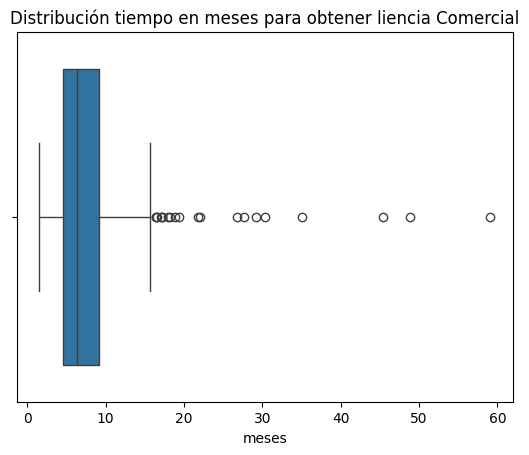

In [21]:
# VAMOS A CALCULAR LOS OUTLINERS DEL CAMPO MESES. PARA ESO USAREMOS EL GRÁFICO BOXPLOT DE SEABORN.

sns.boxplot(x= "meses", data = licencias)
plt.title("Distribución tiempo en meses para obtener liencia Comercial")

Vemos que outliers. Hay licencias que se han tardado en conceder casi 50 meses.  No es un error de fechas. Eso es por motivos puntuales de los proyectos. 
Motivos que no podemos explicar con los datos que tenemos disponibles para este estudio.

In [22]:
# Calculamos los rangos interquantilicos para localizar los outliers.

primer_cuartil = licencias["meses"].quantile(0.25)
tercer_cuartil = licencias["meses"].quantile(0.75)
rango_intercuartilico = tercer_cuartil - primer_cuartil

array_superior = tercer_cuartil + 1.5*rango_intercuartilico
array_inferior = primer_cuartil - 1.5*rango_intercuartilico

array_inferior
array_superior

print(f"El primer cuartil es {round(primer_cuartil,2)} meses")
print(f"El tercer cuartil es {round(tercer_cuartil,2)} meses")
print(f"El array inferior  es {round(array_inferior,2)} meses")
print(f"El array superior es {round(array_superior,2)} meses")

El primer cuartil es 4.54 meses
El tercer cuartil es 9.19 meses
El array superior es 16.17 meses


In [23]:
mediana= licencias["meses"].median()
promedio = licencias["meses"].mean()

print(f"La mediana es {round(mediana,2)} meses")
print(f"El promedio es {round(promedio,2)} meses")

La mediana es 6.28 meses
El promedio es 8.25 meses


Todo los valores del campo meses que estén por encima de 16.16 meses es un outlier.
Como la muestra es muy pequeña, 250 licencias, no es una buena idea borrar los outliers. En su lugar,  vamos a sustituir todo las liencias que sean superior a 16.16 meses por 16.16.
Así mantendremos los  250 registros,  evitaremos los efectos negativos de los outliers y el modelo tendrá un poco más de variabilidad que si usamos la media o la mediana para sustituir los outliers.


In [24]:
# Creamos nueva columna que llamaremos meses corregidos.

licencias["meses_corregidos"] = licencias["meses"]

# Sustiuitmos los valores de los outliners

licencias["meses_corregidos"] = np.where(licencias["meses_corregidos"] > array_superior, array_superior, licencias["meses_corregidos"])



Text(0.5, 1.0, 'Distribución de los meses corregidos')

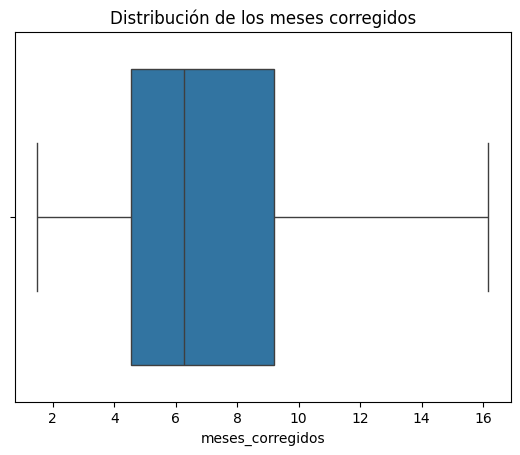

In [25]:
# Hacemos el boxplot de la nueva variable "meses_corregidos"

sns.boxplot(x= "meses_corregidos", data = licencias)
plt.title("Distribución de los meses corregidos")

Análisis de la varible "Sup Venda (m2)"

Esta variable mide los metros cuadrados que tiene cada establecimiento comercial. Hay algunos valores inferiores a  800m2 eso es debido a que fue una ampliación del establecimiento comercial  gracias a la cual la superficie pasó a tener más de 800 m2  y tuvo que solicitar la licencia comercial.

Text(0.5, 1.0, 'Distribución de los variable Sup Venda (m2)')

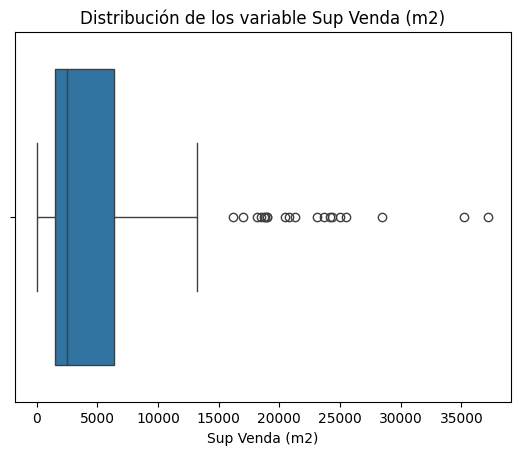

In [26]:
# Hacemos el boxplot de la nueva variable "Sup Venda (m2)" y calculamos sus estadísticos.

sns.boxplot(x= "Sup Venda (m2)", data = licencias)
plt.title("Distribución de los variable Sup Venda (m2)")

In [27]:
licencias["Sup Venda (m2)"].describe()

count      250.000000
mean      5044.719280
std       6166.667092
min         69.750000
25%       1491.327500
50%       2527.530000
75%       6363.682500
max      37216.560000
Name: Sup Venda (m2), dtype: float64

Al Analizar la variable Superficie Venda en m2, vemos que  la mitad de los establecimientos tienen una superficie de entre 1491m2 y 6363.50m2. La Media está en 5044 m2 pero la desviación estandar es de 6166.68 m2 lo cual indica que hay una gran dispersión. 
La estblecimiento mediano es de 2527m2 lo cual está muy por debajo de la media y el valor máximo es de 37216.56  Esto implica que la distribución está sesgada a la derecha y hay valores extremos (outliers)

Como veremos más adelante, no hay ninguna correlación entre los m2 de los establecimientos  comerciales y el tiempo de concesión de la licencia, con lo cual, no modificaremos los outliers de esta variable y los dejaremos tal cual.

In [28]:
# Ahora que tenemos el fichero limpio, crearemos un fichero CSV que será el que usemos para cargar en Power BI.

licencias.to_csv(r"C:\Temp\licencias.csv",sep=",", index=False)

In [29]:
#ESTUDIO CORRELACIONES

#El dataset que estamos analizando contiene datos categóricos y numéricos, pero el método ".corr()" sólo funciona con variables numérico. Para que no nos de error 
#seleccionaremos sólo las variable numericas.


licencias_numericos = licencias[["Sup Venda (m2)","meses_corregidos"]]
matriz_correlacion = licencias_numericos.corr()

matriz_correlacion

,Sup Venda (m2),meses_corregidos
Sup Venda (m2),1.000000,-0.009959
meses_corregidos,-0.009959,1.000000


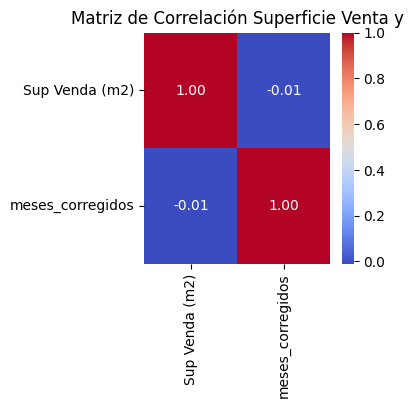

In [30]:
plt.figure(figsize=(3, 3))
sns.heatmap(matriz_correlacion, annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Matriz de Correlación Superficie Venta y')
plt.show()

Text(0.5, 1.0, 'Correlación entre los meses corregidos y la Sup Venda(m2) ')

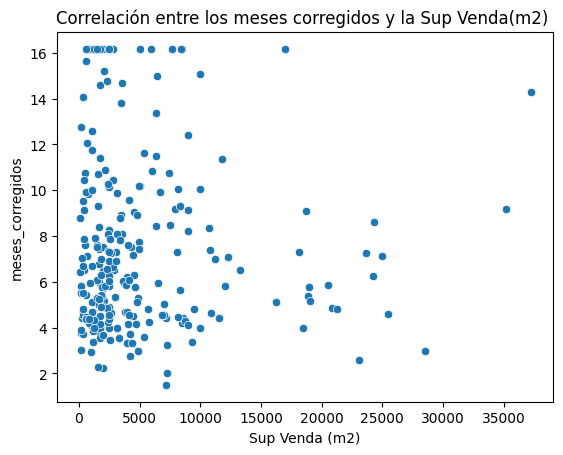

In [31]:
sns.scatterplot(x= "Sup Venda (m2)", y ="meses_corregidos" , data = licencias)
plt.title("Correlación entre los meses corregidos y la Sup Venda(m2) ")

El gráfico parece mostrar que no hay una correlación obvia entre los meses corregidos y la superficie vendida, lo que sugiere que la superficie de venta en m2 del establecimiento , en este caso, no es un factor clave para explicar el tiempo en que se tarda en obtener una licencia.


#Analisis de la relación entre el numero de licencias que solicita una empresa y el tiempo que tarda en recibir la licencia.

El objetivo es ver si las empresas que tienen más experiencia solicitando las licencias comerciales, consiguen reducir su promedio ya que tienen más experiencia presentando proyectos más acordes a la normativa, con menos errores, y por lo tanto más fáciles de aprobar por parte de la administración.

In [32]:
# Vamos a realizar una consulta. Vamos a seleccionar las solicitudes que han sido aprobadas, las agrupamos por solicitantes y calculamos cuantas licencias 
# se han otorgado y el tiempo promedio para obtenerlas. Finalmente, ordenamos por el campo "Count" para que la query esté ordenada en función del número 
# que se han otorgado a cada solicitante.


df = licencias[licencias["Sentit Resolució (Ferma)"] == "Favorable"].groupby("Sol·licitant")["meses_corregidos"].agg(['count', 'mean']).sort_values("count")

df_1 = pd.DataFrame(df,columns=["count","mean"])
df_1 = df_1.reset_index()

# Nos quedaremos sólo con aquellos solicitantes que con más de dos licencias comerciales.

df_1 = df_1[df_1["count"]> 2]
df_1

,Sol·licitant,count,mean
115,"AKI BRICOLAJE ESPAÑA, SL",3,7.922222
116,"CABOEL, SL",3,7.688889
117,"EURO DEPOT ESPAÑA, SA",3,10.566667
118,"IKEA IBERICA, SA",4,7.541667
119,"UNIPREUS, SL",5,5.206667
120,"EL CORTE INGLÉS, SA",5,4.766667
121,"ALDI SUPERMERCADOS, SL",6,5.711111
122,"BON PREU, SAU",7,7.904762
123,"LIDL SUPERMERCADOS, SA",8,8.579167
124,"BRICOLAJE BRICOMAN, SLU",9,7.762963


In [33]:
pearson_coefficient = np.corrcoef(df_1["count"], df_1["mean"])[0, 1]
pearson_coefficient

-0.31359840377431736

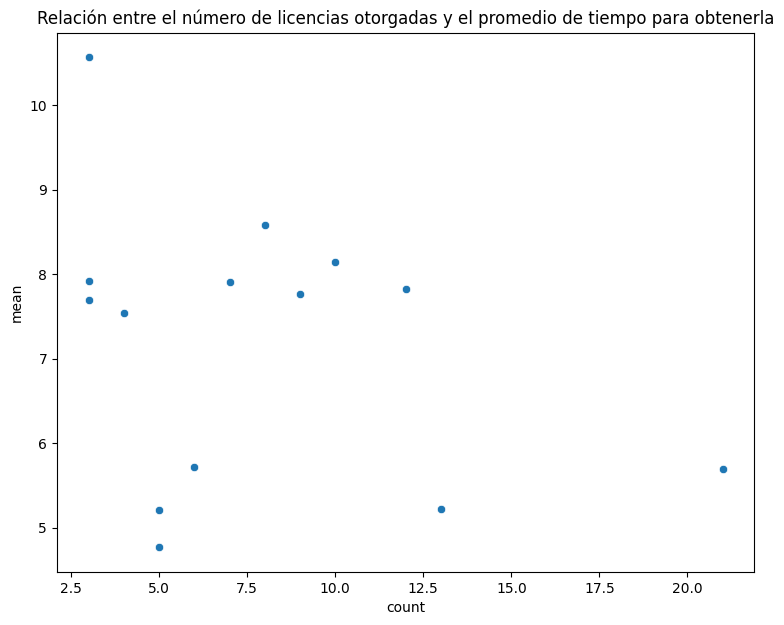

In [34]:
# Prodecemos a hacer un scatterplot del dataset anterior.

plt.figure(figsize=(9, 7))
sns.scatterplot(x="count", y="mean", data= df_1)
plt.title("Relación entre el número de licencias otorgadas y el promedio de tiempo para obtenerla")
plt.show()

In [35]:
# Vamos a calcular el coeficiente de pearson para aquellas empresas que han presentado más de dos proyectos.

pearson_coefficient = np.corrcoef(df_1["count"], df_1["mean"])[0, 1]
pearson_coefficient

-0.31359840377431736


El coeficiente de pearson indica que hay una correláción muy débil (-0.313 )entre  el número de proyectos que presenta una empresa y el tiempo que d

Sin embargo, el gráfico se puede analizar en dos partes.  
1 -  Para aquellos solicitantes que  con entre 2.5 y 7 licencias, no se ve ninguna relación aparente.
2 - Aquellas empresas que han gestionado más  de 7 licencias, si se puede  empezar a ver un patrón. Contra más solicitudes, el tiempo promedio empieza a caer.

In [36]:
#Vamos a calcular el coeficiente de pearson seleccionando sólo  aquellas empresas con más de 7 proyectos presentados a la administración

df_2 = df_1[df_1["count"]> 7]
df_2

,Sol·licitant,count,mean
123,"LIDL SUPERMERCADOS, SA",8,8.579167
124,"BRICOLAJE BRICOMAN, SLU",9,7.762963
125,LEROY MERLIN S.A,10,8.140000
126,"MERCADONA, SA",12,7.822222
127,"DECATHLON ESPAÑA, SA",13,5.217949
128,"GESDIP, SAU",21,5.688889


In [37]:
pearson_coefficient = np.corrcoef(df_2["count"], df_2["mean"])[0, 1]
pearson_coefficient

-0.7523147468672728

En este caso el coeficiente de pearson indica que hay una fuerte correlación  negativa entre aquellas empresas que han presentado más de siete proyectos y el promedio en que tardan en obtener las liencias. Sin embargo, no podemos confirmar dicha relación ya que disponemos de muy poquitos datos (6 registros).